# Tutorial about analyzing localization properties

In [1]:
from pathlib import Path

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import locan as sp

In [2]:
sp.show_versions(system=False, dependencies=False, verbose=False)


Locan:
   version: 0.7.dev3+gb9aca40

Python:
   version: 3.8.8


## Load rapidSTORM data file

Identify some data in the test_data directory and provide a path using pathlib.Path

In [3]:
path = sp.ROOT_DIR / 'tests/Test_data/rapidSTORM_dstorm_data.txt'
print(path, '\n')

dat = sp.load_rapidSTORM_file(path=path, nrows=1000)

c:\users\soeren\mydata\programming\python\projects\locan\locan\tests\Test_data\rapidSTORM_dstorm_data.txt 



Print information about the data: 

In [4]:
print(dat.data.head(), '\n')
print('Summary:')
dat.print_summary()
print('Properties:')
print(dat.properties)

   position_x  position_y  frame  intensity  chi_square  local_background
0     9657.40     24533.5      0   33290.10   1192250.0           767.733
1    16754.90     18770.0      0   21275.40   2106810.0           875.461
2    14457.60     18582.6      0   20748.70    526031.0           703.370
3     6820.58     16662.8      0    8531.77   3179190.0           852.789
4    19183.20     22907.2      0   14139.60    448631.0           662.770 

Summary:
identifier: "1"
comment: ""
creation_date: "2021-03-04 13:45:37 +0100"
modification_date: ""
source: EXPERIMENT
state: RAW
element_count: 999
frame_count: 48
file_type: RAPIDSTORM
file_path: "c:\\users\\soeren\\mydata\\programming\\python\\projects\\locan\\locan\\tests\\Test_data\\rapidSTORM_dstorm_data.txt"

Properties:
{'localization_count': 999, 'position_x': 16066.234912912912, 'position_y': 17550.369092792796, 'region_measure_bb': 1064111469.8204715, 'localization_density_bb': 9.388114199807877e-07, 'subregion_measure_bb': 130483.2086

## Visualization

<AxesSubplot:title={'center':'counts'}, xlabel='position_x', ylabel='position_y'>

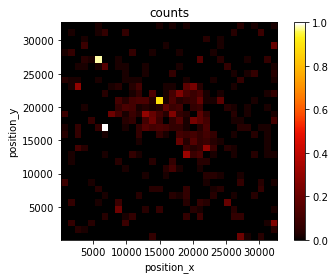

In [5]:
sp.render_2d(dat, bin_size=1000, rescale=(0,100));

### Analyze a localization property

We have a look at a certain localization property in locdata. 

The analysis class `LocalizationProperty` provides a dataframe with the property as function of another property (index), and a plot or histogram of this property.

In [6]:
lprop = sp.LocalizationProperty(loc_property='intensity', index='frame')

In [7]:
lprop.compute(dat)
print(lprop.results.head())

       intensity
frame           
0       33290.10
0       21275.40
0       20748.70
0        8531.77
0       14139.60


The plot shows results smoothed by a running average according to the specified window.

<AxesSubplot:title={'center':'intensity(frame)\n (window=100)'}, xlabel='frame', ylabel='intensity'>

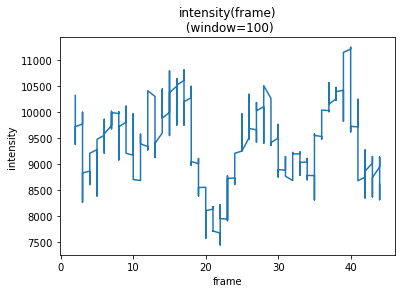

In [8]:
lprop.plot(window=100);

The histogram shows the probability density function of results.

<AxesSubplot:title={'center':'intensity'}, xlabel='intensity', ylabel='PDF'>

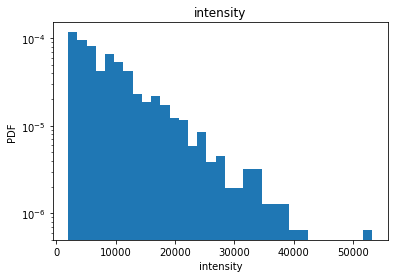

In [9]:
lprop.hist(fit=False);

 Per default the distribution is fitted to an exponential decay.

<AxesSubplot:title={'center':'intensity'}, xlabel='intensity', ylabel='PDF'>

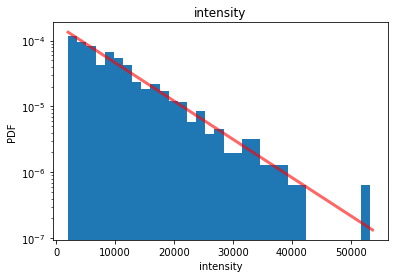

In [10]:
lprop.hist();

Fit results (as derived using the lmfit library) are provided in the distribution_statistics attribute.

In [11]:
lprop.distribution_statistics.parameter_dict()

{'intensity_loc': 2000.38, 'intensity_scale': 7480.661251251252}

In [12]:
lprop.results.min()

intensity    2000.38
dtype: float64

## Fitting different distribution models

Per default the 'with_constraints' flag is True to apply standard fit constraints. This can be set to false and other parameters can be passed to the fit function.

In [13]:
lprop.fit_distributions(with_constraints=False, floc=0)

In [14]:
lprop.distribution_statistics.parameter_dict()

{'intensity_loc': 0.0, 'intensity_scale': 9481.041251251252}

{'intensity_loc': 0.0, 'intensity_scale': 9481.041251251252}


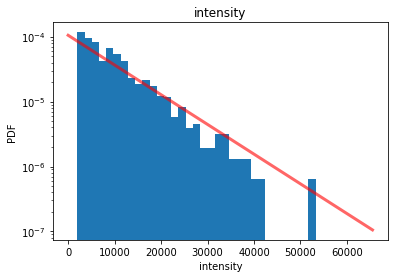

In [15]:
lprop.hist(fit=True)
print(lprop.distribution_statistics.parameter_dict())

## Showing correlations between two properties

By setting the index to another localization property correlations can be shown.

In [16]:
lprop = sp.LocalizationProperty(loc_property='intensity', index='local_background').compute(dat)

<AxesSubplot:title={'center':'intensity(local_background)\n (window=1)'}, xlabel='local_background', ylabel='intensity'>

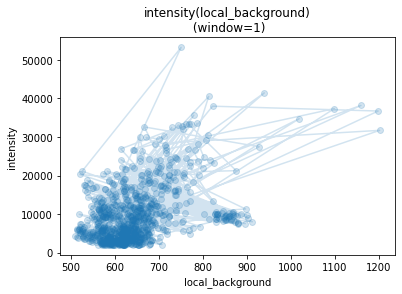

In [17]:
lprop.plot(marker='o', alpha=0.2);

Correlation coefficients can be investigated in more detail using the LocalizationPropertyCorrelation class that is just a visualization of `pandas.DataFrame.corr()`.

In [18]:
lpcorr = sp.LocalizationPropertyCorrelations(loc_properties=['intensity', 'local_background']).compute(dat)
lpcorr

LocalizationPropertyCorrelations(loc_properties=['intensity', 'local_background'])

<AxesSubplot:title={'center':'Localization Property Correlations'}>

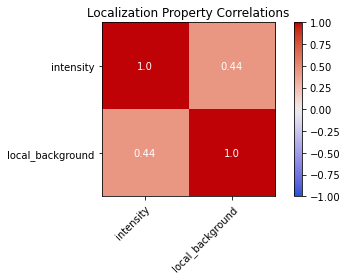

In [19]:
lpcorr.plot();

## 2-dimensional distribution of localization properties

In order to investigate a certain localization property in 2D you can just print the image with a color code representing the mean value of the chosen localization property in each bin.

<AxesSubplot:title={'center':'local_background'}, xlabel='position_x', ylabel='position_y'>

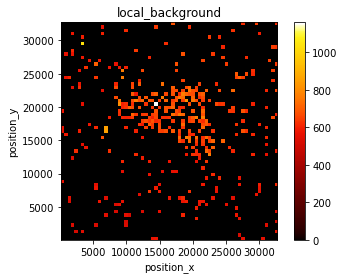

In [20]:
sp.render_2d_mpl(dat, other_property='local_background', bin_size=500);

Otherwise use a specific class to analyse localization properties in 2d. Per default a bimodal normal distribution is fitted. This can e.g. help to check on even illumination during the recording.

In [21]:
lprop2d = sp.LocalizationProperty2d(loc_properties=None, other_property='local_background').compute(dat)

<AxesSubplot:title={'center':'local_background'}, xlabel='position_x', ylabel='position_y'>

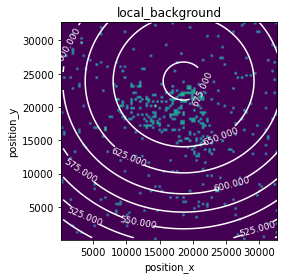

In [22]:
lprop2d.plot();

In [23]:
lprop2d.report()

Fit results for:

[[Model]]
    Model(model_function)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 434
    # variables        = 5
    chi-square         = 1223952.23
    reduced chi-square = 2853.03551
    Akaike info crit   = 3457.93521
    Bayesian info crit = 3478.30044
[[Variables]]
    amplitude:  677.346670 +/- 4.22658371 (0.62%) (init = 1159.15)
    center_x:   18601.9873 +/- 791.243335 (4.25%) (init = 16442.37)
    center_y:   23902.7579 +/- 1355.40192 (5.67%) (init = 16366.63)
    sigma_x:    36890.3457 +/- 3005.58735 (8.15%) (init = 8137.064)
    sigma_y:    34420.5024 +/- 2799.54907 (8.13%) (init = 8173.337)
[[Correlations]] (unreported correlations are < 0.250)
    C(center_y, sigma_y)   =  0.846
    C(amplitude, sigma_x)  = -0.525
    C(amplitude, center_y) =  0.468
    C(center_x, sigma_x)   =  0.358
    C(sigma_x, sigma_y)    = -0.320
    C(center_y, sigma_x)   = -0.285
Maximum fit value in image: 677.343
Minimu